In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  # type: ignore
import numpy as np
import numpy.typing as npt

from data.gaussian_classes import gaussian_class_data
from logistic_regression import PolynomialBasisLogisticRegression

In [2]:
means = [
    np.array([0.0, 0.0]),
    np.array([3.0, 3.0]),
    np.array([-3, 3]),
]
covariances = [
    np.array(
        [
            [1.0, 0.0],
            [0.0, 1.0],
        ]
    ),
    np.array(
        [
            [2.0, 0.0],
            [0.0, 2.0],
        ]
    ),
    np.array(
        [
            [1.0, 0.0],
            [0.0, 1.0],
        ]
    ),
]
data = gaussian_class_data(means, covariances, n_train=30, n_test=30)
class_1 = data.x_train[data.y_train[:, 0] == 1.0]
class_2 = data.x_train[data.y_train[:, 1] == 1.0]
class_3 = data.x_train[data.y_train[:, 2] == 1.0]

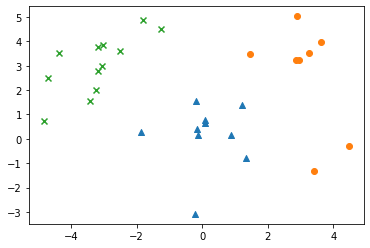

In [3]:
plt.scatter(class_1[:, 0], class_1[:, 1], marker="^")
plt.scatter(class_2[:, 0], class_2[:, 1], marker="o")
plt.scatter(class_3[:, 0], class_3[:, 1], marker="x")

phi.shape: (30, 3)
before np.ones
S:
[[0.6 0.3 0.1]
 [0.7 0.2 0.1]
 [0.3 0.6 0.1]
 [0.  0.  0.9]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.1 0.1 0.7]
 [0.4 0.3 0.3]
 [0.7 0.3 0. ]
 [0.6 0.1 0.2]
 [0.2 0.1 0.7]
 [0.3 0.1 0.6]
 [0.8 0.2 0.1]
 [0.4 0.3 0.3]
 [0.6 0.1 0.3]
 [0.7 0.1 0.2]
 [0.  0.  1. ]
 [0.4 0.2 0.4]
 [0.1 0.  0.9]
 [0.  0.  1. ]
 [0.4 0.2 0.5]
 [0.7 0.2 0.2]
 [0.4 0.1 0.5]
 [0.3 0.3 0.4]
 [0.  0.  1. ]
 [0.7 0.2 0.1]
 [0.7 0.3 0.1]
 [0.7 0.2 0. ]
 [0.4 0.2 0.4]
 [0.3 0.2 0.5]]
y:
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
loop time 0.0065233707427978516
S:
[[0.1 0.  0.9]
 [0.  0.  1. ]
 [0.8 0.  0.2]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.1 0.9 0. ]
 [0.4 0.

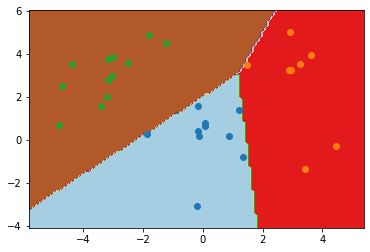

In [4]:
model = PolynomialBasisLogisticRegression(
    m_degrees=2, k_classes=len(data.y_train[1, :])
)
model.fit(data.x_train, data.y_train)

minx = data.x_train[:, 0].min() - 1
maxx = data.x_train[:, 0].max() + 1
miny = data.x_train[:, 1].min() - 1
maxy = data.x_train[:, 1].max() + 1
xrange = np.arange(minx, maxx, 0.1)
yrange = np.arange(miny, maxy, 0.1)
xx, yy = np.meshgrid(xrange, yrange)  # type: ignore
xx_flat = xx.flatten()
yy_flat = yy.flatten()
xx_flat = xx_flat.reshape((len(xx_flat), 1))
yy_flat = yy_flat.reshape((len(yy_flat), 1))
grid = np.hstack((xx_flat, yy_flat))
predictions = np.argmax(model.predict(grid), axis=1)
zz = predictions.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap="Paired")
for c in range(3):
    row_ix = np.where(data.y_train[:, c] == 1.0)
    plt.scatter(data.x_train[row_ix, 0], data.x_train[row_ix, 1], cmap="Paired")